# Manipulate Roads shapefile data to London

Part of [london-data](https://github.com/jamesdamillington/london-data), by [jamesdamillington](https://github.com/jamesdamillington)

## Aim
Produce shapefiles or road locations (and ancillary data) for London. 

In [1]:
from datetime import date
print(f'Last tested: {date.today()}')

Last tested: 2023-11-18


In [2]:
#handle warnings
import warnings
warnings.filterwarnings("ignore")

import pyproj
import geopandas as gpd
import shapely
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

Read London Boundary data for clipping below (see [london-census2021-geography.ipynb](https://github.com/jamesdamillington/london-data/blob/main/code/london-census2021-geography.ipynb) for source). 

In [3]:
lad = gpd.read_file("../data/geographies/census/london-2021-lad22-gen20.shp")

## Motorways and 'A Roads'

For motorways and A roads in the UK's Strategic Road Network, we can use the full OS Open Roads data (2023)

### OS Open Roads

[OS Open Roads Data](https://www.ordnancesurvey.co.uk/products/os-open-roads) will be clipped to the extent of London Boroughs (i.e., local authority districts). 

> Source: Ordnance Rurvey (OS) licensed under the Open Government Licence v.3.0
>
> Contains OS data © Crown Copyright [and database right] (2023)

We start from the TQ tile (luckily greater London is completely within that single tile):

In [4]:
tq_rl = gpd.read_file("../data/inputs/geographies/roads/oproad_essh_gb/tq/TQ_RoadLink.shp")

In [5]:
tq_rl.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 447929 entries, 0 to 447928
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   fictitious  447929 non-null  object  
 1   identifier  447929 non-null  object  
 2   class       447929 non-null  object  
 3   roadNumber  61306 non-null   object  
 4   name1       347950 non-null  object  
 5   name1_lang  0 non-null       object  
 6   name2       0 non-null       object  
 7   name2_lang  0 non-null       object  
 8   formOfWay   447929 non-null  object  
 9   length      447929 non-null  int64   
 10  primary     447929 non-null  object  
 11  trunkRoad   447929 non-null  object  
 12  loop        447929 non-null  object  
 13  startNode   447929 non-null  object  
 14  endNode     447929 non-null  object  
 15  structure   135 non-null     object  
 16  nameTOID    347950 non-null  object  
 17  numberTOID  61306 non-null   object  
 18  function    4479

To reduce file size, we will output only major roads. Check how classes are labelled:

In [6]:
pd.unique(tq_rl['class'])

array(['Unknown', 'Motorway', 'Not Classified', 'Unclassified', 'A Road',
       'Classified Unnumbered', 'B Road'], dtype=object)

We will use Motorway and 'A Road' only:

In [7]:
tq_manda = tq_rl[(tq_rl['class']=='Motorway') | (tq_rl['class']=='A Road')]

In [8]:
tq_manda.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 45070 entries, 1 to 447900
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   fictitious  45070 non-null  object  
 1   identifier  45070 non-null  object  
 2   class       45070 non-null  object  
 3   roadNumber  45070 non-null  object  
 4   name1       40539 non-null  object  
 5   name1_lang  0 non-null      object  
 6   name2       0 non-null      object  
 7   name2_lang  0 non-null      object  
 8   formOfWay   45070 non-null  object  
 9   length      45070 non-null  int64   
 10  primary     45070 non-null  object  
 11  trunkRoad   45070 non-null  object  
 12  loop        45070 non-null  object  
 13  startNode   45070 non-null  object  
 14  endNode     45070 non-null  object  
 15  structure   49 non-null     object  
 16  nameTOID    40539 non-null  object  
 17  numberTOID  45070 non-null  object  
 18  function    45070 non-null  object  


Quick plot to see the extent and density of these data:

<AxesSubplot:>

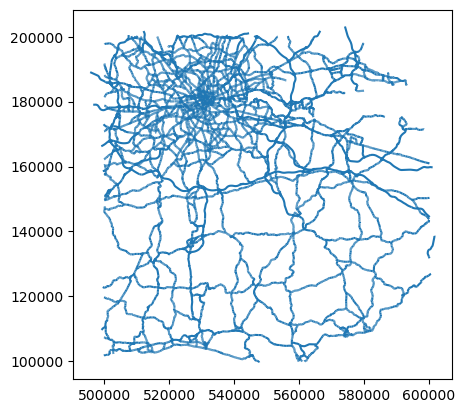

In [9]:
tq_manda.plot()

Same data but zoom to London extent and add London Borough layer to visualise:

(155000.0, 205000.0)

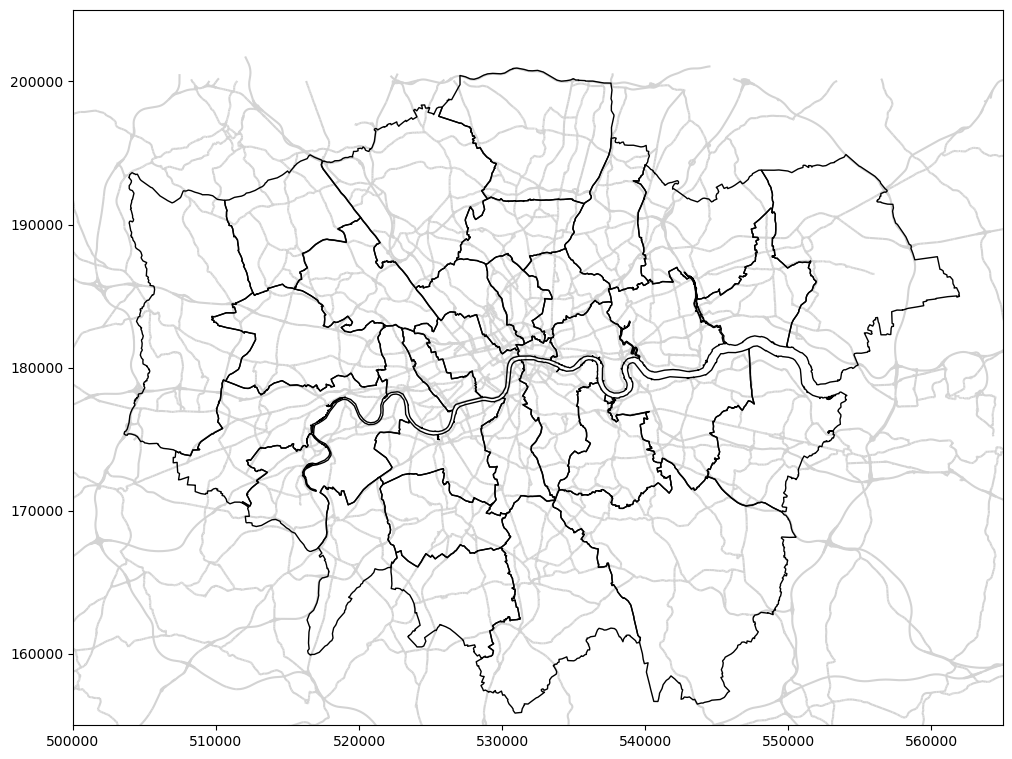

In [10]:
xlims=[500000, 565000]
ylims=[155000, 205000]

fig, ax1 = plt.subplots(1, figsize=(12, 10))  

tq_manda.plot(ax=ax1, column="class", edgecolor="lightgrey", zorder=1)

lad.plot(ax=ax1, facecolor="none", edgecolor="black", zorder=2)

ax1.set_xlim(xlims)
ax1.set_ylim(ylims) 

Clip these roads to the extent of London Boroughs:

In [11]:
lad_manda = gpd.clip(tq_manda, lad, keep_geom_type=True)

Check visually:

<AxesSubplot:>

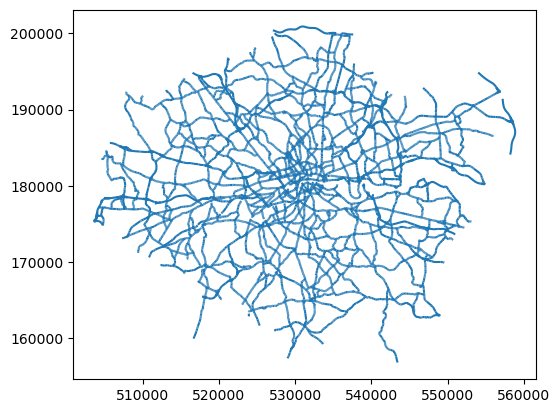

In [12]:
lad_manda.plot()

<AxesSubplot:>

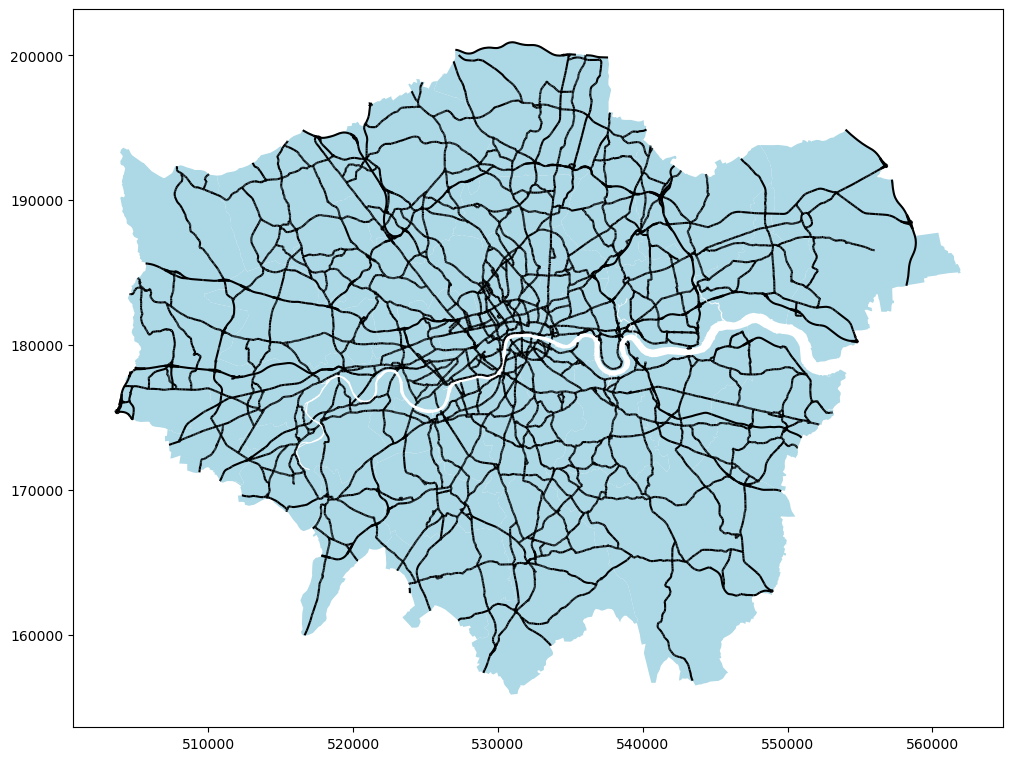

In [13]:
fig, ax1 = plt.subplots(1, figsize=(12, 10))  

lad_manda.plot(ax=ax1, column="class", edgecolor="black", zorder=2)

lad.plot(ax=ax1, facecolor="lightblue", edgecolor="none", zorder=1)


Write to file:

In [14]:
roads_opath = Path("../data/geographies/roads/")
lad_manda.to_file(roads_opath / "london-2023-oproad-MandA.shp")

## Major Road Network

Alternatively, we might want to use the [Major Road Network](https://www.data.gov.uk/dataset/95f58bfa-13d6-4657-9d6f-020589498cfd/major-road-network) created by the Department for Transport in 2018

> Source: Department for Transport (2022) licensed under the Open Government Licence v.3.0


In [15]:
mrn18 = gpd.read_file("../data/inputs/geographies/roads/Major_Road_Network_2018_Open_Roads/Major_Road_Network_2018_Open_Roads.shp")

In [16]:
mrn18.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 62292 entries, 0 to 62291
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   fid_        62288 non-null  float64 
 1   id          62288 non-null  object  
 2   endNode     62288 non-null  object  
 3   startNode   62288 non-null  object  
 4   roadNumber  62288 non-null  object  
 5   roadNameTO  46554 non-null  object  
 6   fictitious  62288 non-null  float64 
 7   roadClassi  62288 non-null  object  
 8   roadFuncti  62288 non-null  object  
 9   formOfWay   62288 non-null  object  
 10  length      62288 non-null  float64 
 11  length_uom  62288 non-null  object  
 12  loop        62288 non-null  float64 
 13  primaryRou  62288 non-null  float64 
 14  trunkRoad   62288 non-null  float64 
 15  roadClas_1  62288 non-null  object  
 16  name1       46554 non-null  object  
 17  name1_lang  0 non-null      object  
 18  name2       0 non-null      object  
 

As the next plot shows, these data are for all of England

<AxesSubplot:>

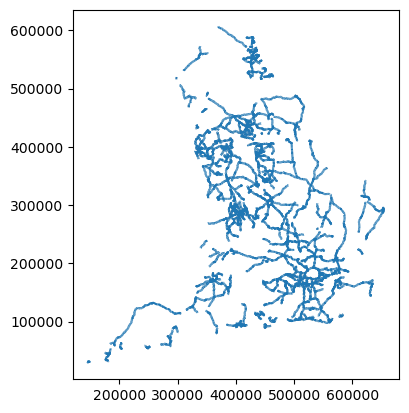

In [17]:
mrn18.plot()

Same data but zoom to London extent and add London Borough layer to visualise:

(155000.0, 205000.0)

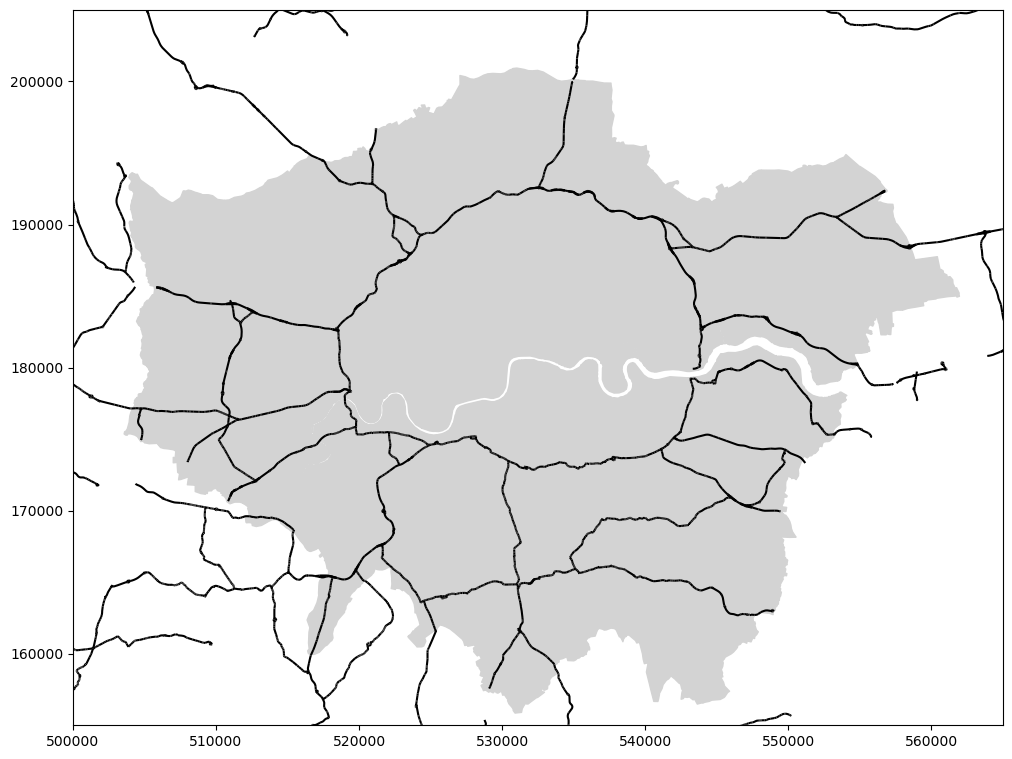

In [18]:
xlims=[500000, 565000]
ylims=[155000, 205000]

fig, ax1 = plt.subplots(1, figsize=(12, 10))  

mrn18.plot(ax=ax1, column="id", edgecolor="k", zorder=2)

lad.plot(ax=ax1, facecolor="lightgrey", edgecolor="lightgrey", zorder=1)

ax1.set_xlim(xlims)
ax1.set_ylim(ylims)   

Clip these roads to the extent of London Boroughs:

In [19]:
lad_mrn18 = gpd.clip(mrn18, lad, keep_geom_type=True)

Check visually:

<AxesSubplot:>

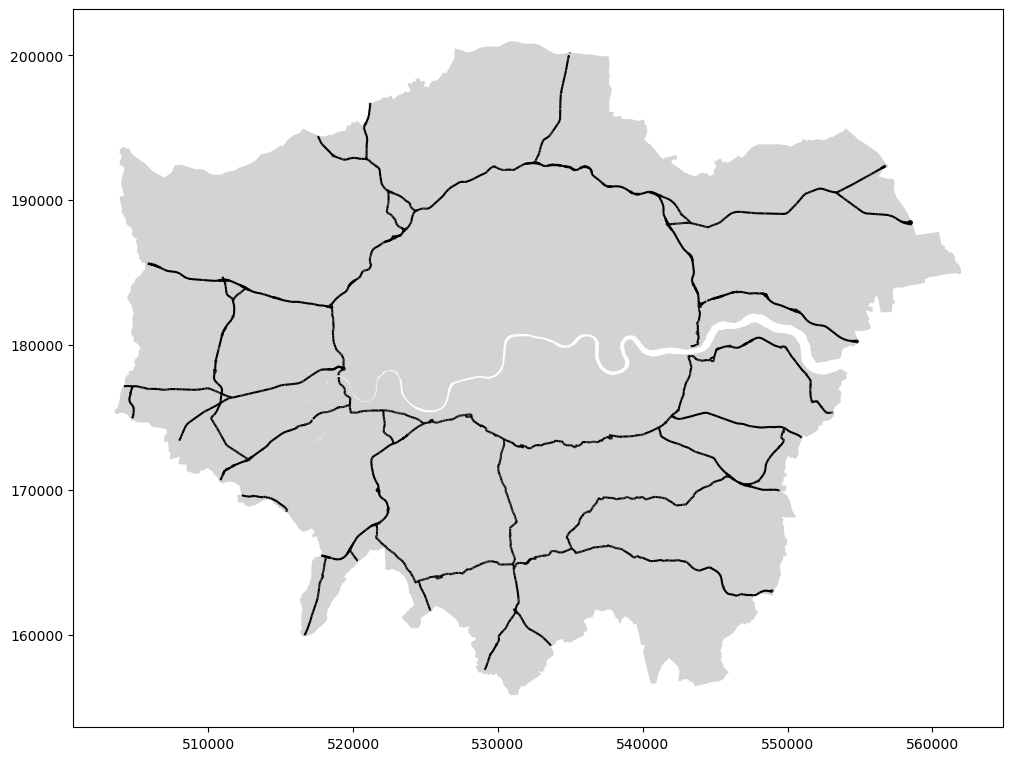

In [20]:
fig, ax1 = plt.subplots(1, figsize=(12, 10))  

lad_mrn18.plot(ax=ax1, column="id", edgecolor="k", zorder=2)

lad.plot(ax=ax1, facecolor="lightgrey", edgecolor="lightgrey", zorder=1)


Write to file:

In [22]:
lad_mrn18.to_file(roads_opath / "london-2018-MRN.shp")